## 최소 제곱법, 최소 자승법 (Least Square Method, Ordinary Least Square)

$$
    \begin{align}
        &f(x) = \beta x + \alpha
$$


In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [8]:

def make_data(w=0.5, b=0.8, size=50, noise=1.0):
    x = np.arange(size)
    y = w * x + b
    noise = np.random.uniform(-abs(noise), abs(noise), size=y.shape)
    yy = y + noise  # 노이즈 추가

    return x, yy

def make_linear(w=0.5, b=0.8, size=50, noise=1.0):
    x, yy = make_data(w=w, b=b, size=size, noise=noise)
    plt.figure(figsize=(10, 7))
    plt.plot(x, yy, color='r')
    plt.scatter(x, yy, label='data')
    plt.legend(fontsize=20)
    plt.title(label=f'y = {w}*x + {b}')
    plt.show()
    print(f'w: {w}, b: {b}')
    return x, yy

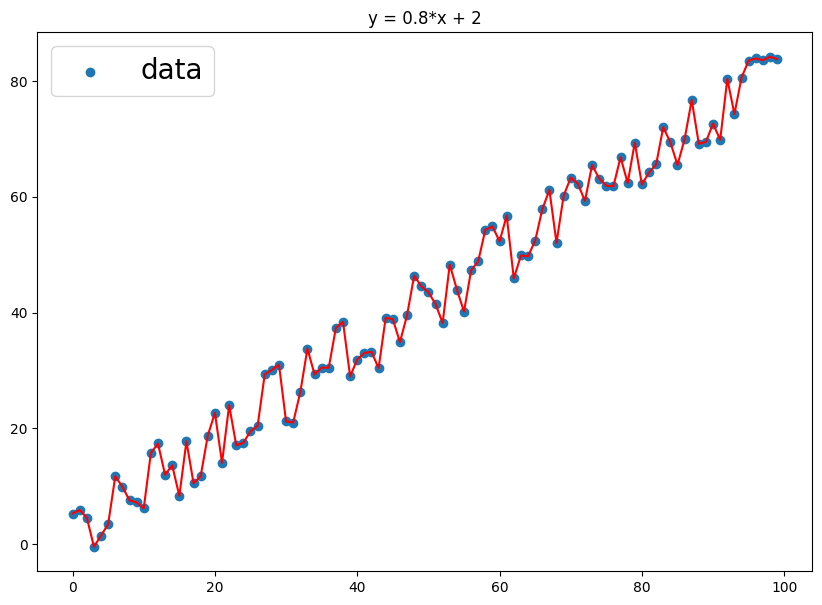

w: 0.8, b: 2


In [9]:

# beta=w=기울기, alpha=b=절편
beta = 0.8
alpha = 2

x, y = make_linear(size=100, w=beta, b=alpha, noise=6)
# y[5]=60     # noise
# y[10]=60    # noise
x_bar = x.mean()
y_bar = y.mean()


In [10]:
calculated_weight = ((x - x_bar) * (y - y_bar)).sum() / ((x - x_bar)**2).sum()
print('w: {:.2f}'.format(calculated_weight))
calculated_bias = y_bar - calculated_weight*x_bar
print('b: {:.2f}'.format(calculated_bias))

# w: 0.79
# b: 2.94

w: 0.81
b: 1.75


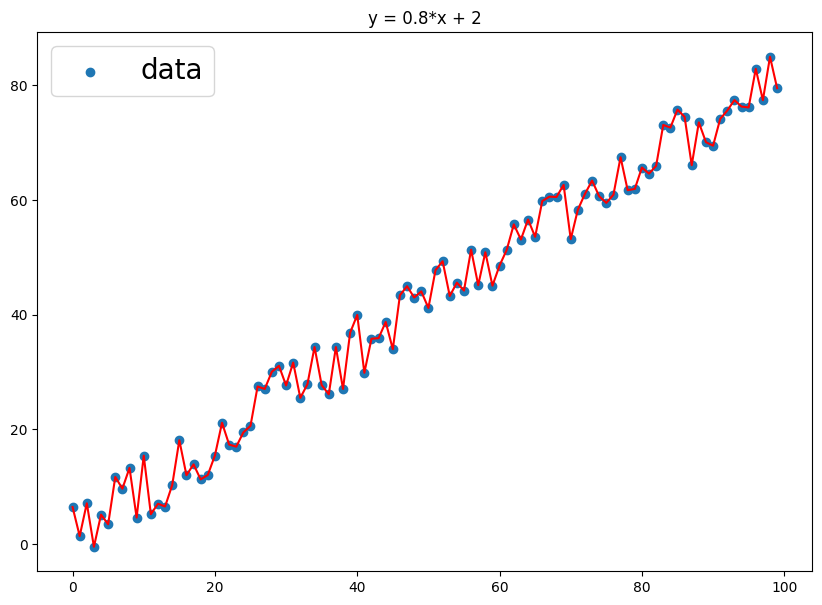

w: 0.8, b: 2


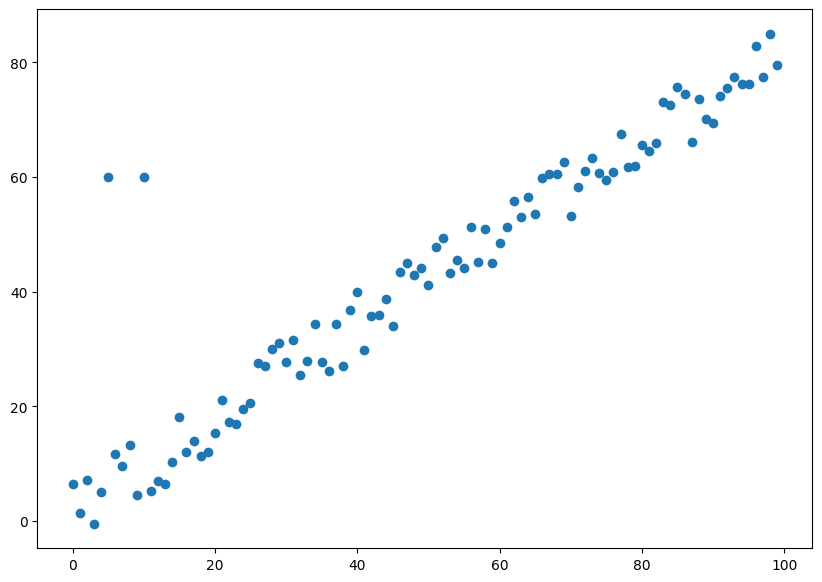

w: 0.76
b: 5.60


In [11]:
x, y = make_linear(size=100, w=beta, b=alpha, noise=6)
y[5]=60     # noise
y[10]=60    # noise
plt.figure(figsize=(10, 7))
plt.scatter(x, y)
plt.show()
x_bar = x.mean()
y_bar = y.mean()
calculated_weight = ((x - x_bar) * (y - y_bar)).sum() / ((x - x_bar)**2).sum()
print('w: {:.2f}'.format(calculated_weight))
calculated_bias = y_bar - calculated_weight*x_bar
print('b: {:.2f}'.format(calculated_bias))

# w: 0.74
# b: 5.82

In [12]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import statsmodels.api as sm

In [13]:

def make_data(w=0.5, b=0.8, size=50, noise=1.0):
    x = np.arange(size)
    y = w * x + b
    noise = np.random.uniform(-abs(noise), abs(noise), size=y.shape)
    yy = y + noise  # 노이즈 추가

    return x, yy

def OLS(x, y):
    df = pd.DataFrame(x, columns=["x"])
    df['y'] = y
    df['intercept'] = 1
    model = sm.OLS(df['y'], df[['intercept', 'x']])
    results = model.fit()
    print(results.summary())

    res = results.params['x']*x + results.params['intercept']
    plt.figure(figsize=(10, 7))
    plt.plot(res, color='red')
    plt.scatter(x, y)
    plt.suptitle("OLS")
    plt.title('y = ' + str(round(results.params['x'], 3))+'*x+' + str(round(results.params['intercept'], 3)))
    plt.show()

    return results.params['x'], results.params['intercept']

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.974
Model:                            OLS   Adj. R-squared:                  0.973
Method:                 Least Squares   F-statistic:                     3604.
Date:                Tue, 30 Jul 2024   Prob (F-statistic):           4.24e-79
Time:                        05:32:31   Log-Likelihood:                -274.87
No. Observations:                 100   AIC:                             553.7
Df Residuals:                      98   BIC:                             558.9
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      1.9906      0.758      2.626      0.0

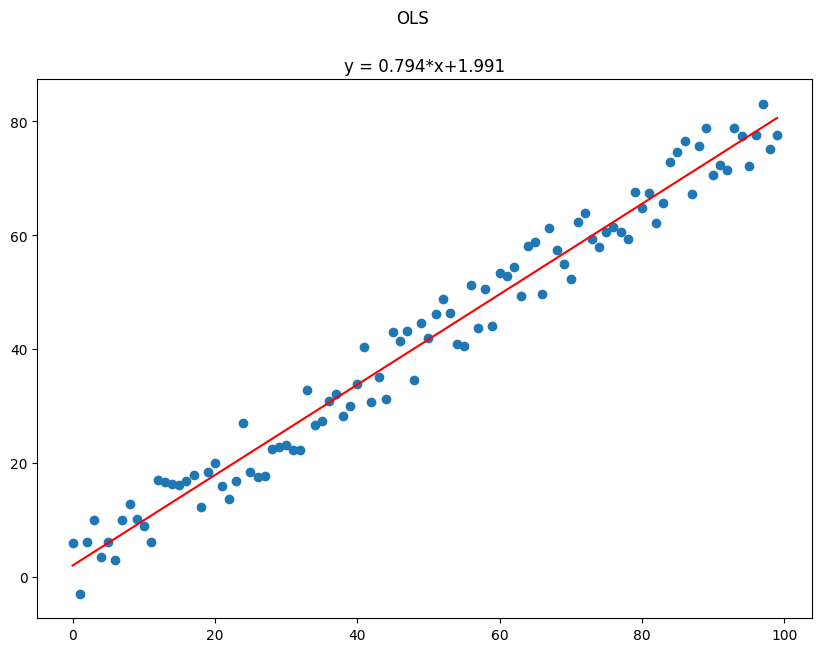

(0.7941352149711731, 1.990610999225034)

In [14]:

beta = 0.8
alpha = 2

x, y = make_data(size=100, w=beta, b=alpha, noise=6)
OLS(x, y)

# w: 0.82
# b: 0.19

w: 0.80, b: 1.99


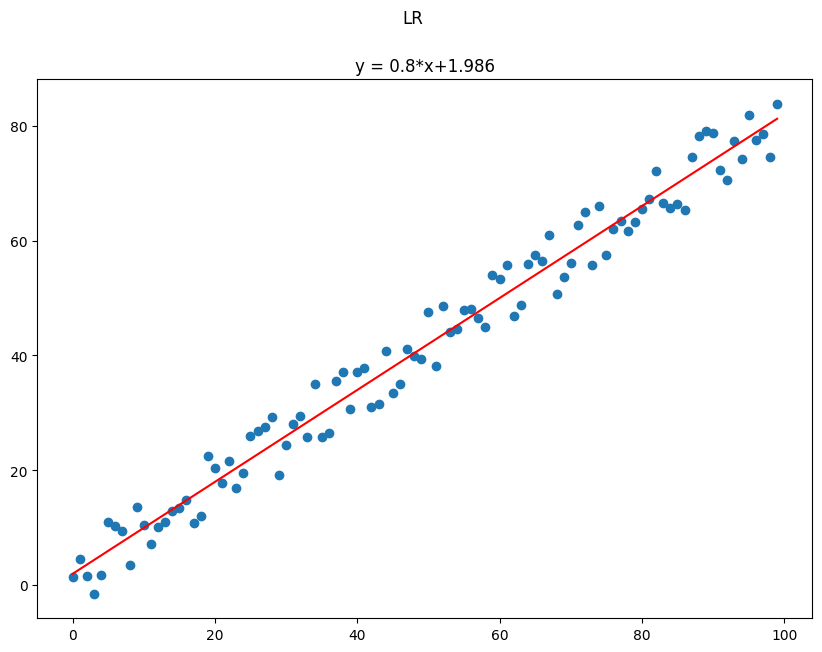

(0.8001432221999992, 1.9863661070586218)

In [15]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.linear_model import LinearRegression

def make_data(w=0.5, b=0.8, size=50, noise=1.0):
    x = np.arange(size)
    y = w * x + b
    noise = np.random.uniform(-abs(noise), abs(noise), size=y.shape)
    yy = y + noise  # 노이즈 추가

    return x, yy

def LR(x, y):
    model = LinearRegression()
    model.fit(x.reshape(-1, 1), y)
    res = model.coef_[0]*x + model.intercept_
    print('w: {:.2f}, b: {:.2f}'.format(model.coef_[0], model.intercept_))

    plt.figure(figsize=(10, 7))
    plt.plot(res, color='red')
    plt.scatter(x, y)
    plt.suptitle("LR")
    plt.title('y = ' + str(round(model.coef_[0], 3))+'*x+' + str(round(model.intercept_, 3)))
    plt.show()
    return model.coef_[0], model.intercept_

beta = 0.8
alpha = 2

x, y = make_data(size=100, w=beta, b=alpha, noise=6)
LR(x, y)

# w: 0.82
# b: 0.19